# Histograms in Python

This document explains how Histograms are set in Python and how to deal with them. Initially we begin by setting up our enviroment and loading the needed packages. Note that to save press Escape + S

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib.pyplot as pyplot

In [2]:
# generate a 1000 random uniform values
data=np.array([np.random.randn() for i in range(1000)])

# 1. Simple way using the hist function

This function is part of the Matplotlib library. By default, hist gives the histogram values in addition to the plot.
The R equivaluent is hist() function.

(array([ 2.,  1.,  0.,  1.,  1.,  1.,  0.,  1.,  2.,  0.,  8.,  2.,  5.,
         6.,  7.,  4., 10.,  5.,  6.,  6., 10.,  4.,  5.,  9., 11., 10.,
        13., 16., 11., 15., 16., 16., 21., 10., 23., 21., 24., 25., 24.,
        20., 20., 17., 32., 28., 33., 23., 16., 27., 20., 27., 20., 27.,
        23., 20., 27., 15., 14., 22., 14., 25., 12., 14., 14., 11., 10.,
         9., 14., 12.,  8.,  5., 12.,  4.,  9.,  7.,  7.,  3.,  2.,  4.,
         1.,  1.,  2.,  4.,  3.,  0.,  1.,  0.,  3.,  0.,  0.,  0.,  1.,
         0.,  2.,  0.,  1.,  0.,  0.,  1.,  0.,  1.]),
 array([-2.72032534, -2.66149976, -2.60267417, -2.54384859, -2.48502301,
        -2.42619742, -2.36737184, -2.30854626, -2.24972067, -2.19089509,
        -2.13206951, -2.07324393, -2.01441834, -1.95559276, -1.89676718,
        -1.83794159, -1.77911601, -1.72029043, -1.66146484, -1.60263926,
        -1.54381368, -1.4849881 , -1.42616251, -1.36733693, -1.30851135,
        -1.24968576, -1.19086018, -1.1320346 , -1.07320901, -1.014383

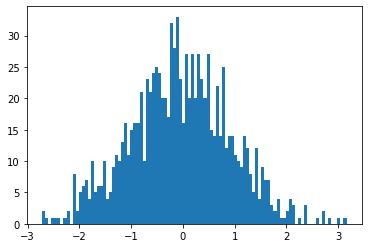

In [3]:
# Plot the values with 100 bins
plt.hist(data,100)

Initially the bin postitions are prointed followed by some of the values.

To only get the plot, we use the show command "plt.show()". We also incoporate the 'density' option to make sure that the histogram is normalized as a probability density. Note that the argument is set to "True" weheas in R the equivalent is "TRUE".

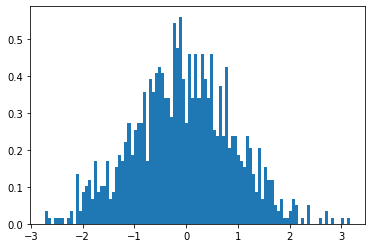

In [4]:
plt.hist(data, 100, density=True)
plt.show()

One can plot a normal distribution of standard normal with mean 0 and standard deviation 1 as below.

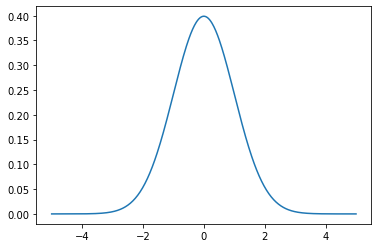

In [5]:
import math
sigma = 1
mu = 0
xx = np.linspace(-5,5,500)
yy = 1/math.sqrt(2*math.pi*sigma) * np.exp(-(xx-mu)**2/(2*sigma**2))
plt.plot(xx,yy)

This can then be taken further to sample from our sample data that was sampled from a random standard normal distribution as we plot a histogram on the random standard normal distribution below.

We begin by creating the x cordinates then input the x coordinates into the distribution function, that is normal pdf in order to create the line graph "plt.plot(xx,yy)" that superimposes the line graph on our histogram. Note that the histogram was put last and the histogram does not have to be placed before the line graph.

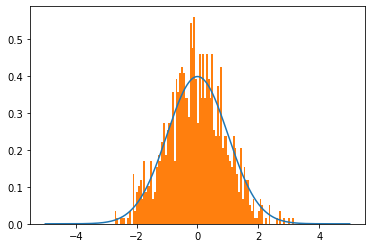

In [6]:
sigma = 1  # Our underliying distribution is standard normal so mean is always 0 and sigma is always 1.
mu = 0
xx = np.linspace(-5,5,500)   # x coardinates are defined as a vector of values. Note the use of numpy for vectors and matrices
yy = 1/math.sqrt(2*math.pi*sigma) * np.exp(-(xx-mu)**2/(2*sigma**2)) # The normal density function creates the y coordinates 
plt.plot(xx,yy)  # Plot the superimposed line as x and y cordinates are 
plt.hist(data,bins=100, density=True)


plt.show()

Lastly we take the above code and add some asthetics of graph title including attempting to change the colour. Below we find all edits in bullet form:

- Title Heading
- x axis label
- y axis label
- Text on histogram
- Grid
- Colour of histogram

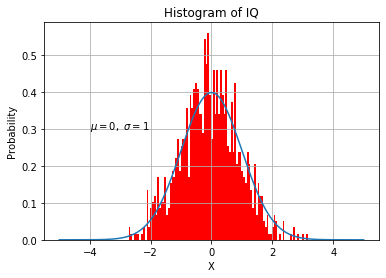

In [7]:
sigma = 1 
mu = 0
xx = np.linspace(-5,5,500)   
yy = 1/math.sqrt(2*math.pi*sigma) * np.exp(-(xx-mu)**2/(2*sigma**2))  
plt.plot(xx,yy)  
plt.hist(data,bins=100, density=True,color="red",label=str)

plt.xlabel('X')                          # X axis label
plt.ylabel('Probability')                # Y axis label
plt.title('Histogram of IQ')             # Plot title
plt.text(-4, 0.3, r'$\mu=0,\ \sigma=1$') # Text on Histogram
plt.grid(True)                           # Plot the grid

plt.show()   

# 2. Better Way: Histogram Function

Numpy has a histogram function which is quite comprehensive:

In [10]:
np.histogram(data, 10)

(array([  9,  59, 104, 200, 243, 207, 109,  50,  13,   6], dtype=int64),
 array([-2.72032534, -2.13206951, -1.54381368, -0.95555785, -0.36730202,
         0.22095381,  0.80920964,  1.39746547,  1.9857213 ,  2.57397713,
         3.16223296]))

1. The first array is the bincounts, not normalised. This is the same as the counts in R that shows the number of points within each bin.

2. The second array contains $n + 1$ points that specify the bases of the n bins we want, so that array has one more point than the bincount array. This is what we would call the 'bin specifications'.

0. With this in mind, here is how we can plot the result as a bar chart:

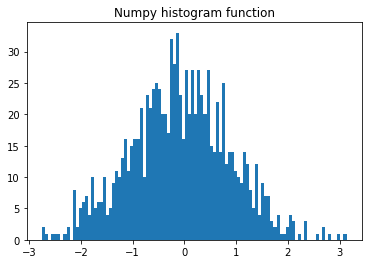

In [18]:
nbins = 100                                # Number of bins
hist, bin_spec = np.histogram(data, nbins) # First argument is bincounts array, second is the binspecifications
a, b = min(bin_spec), max(bin_spec)        # Assign the min to a and max to b
dx = (b-a)/nbins
plt.bar(bin_spec[:-1], hist, width = dx)
plt.title('Numpy histogram function')      # Plot title

plt.show()

- The  direction bin_spec[:-1] takes all elements except the last, so we are positioning the bins with the left coordintates. 
- To positioning the bins with the left coordinates. To position the bins with center points, push the position by $d x/2$:

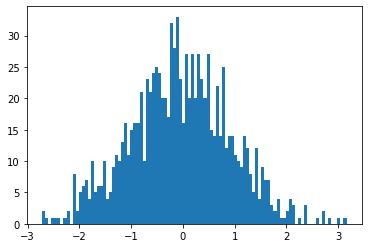

In [19]:
nbins = 100
hist, bin_spec = np.histogram(data, nbins)
a, b = min(bin_spec), max(bin_spec)
dx = (b-a)/nbins
plt.bar(bin_spec[:-1]+dx/2.0, hist, width = dx )
plt.show()